In [190]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

np.set_printoptions(precision=4, linewidth=200, sign=" ")
plt.rcParams["figure.figsize"] = [15,10]

In [191]:
path = r"C:\Users\chris\Documents\Work\Polymetrix\Rust\CruxTest\pose_graph\examples\output\H.json"

with open(path, "r") as inp:
    data = json.load(inp)
    data = np.array(data[0], dtype=float).reshape((data[1], data[2]))

data.shape

(594, 594)

<Axes: >

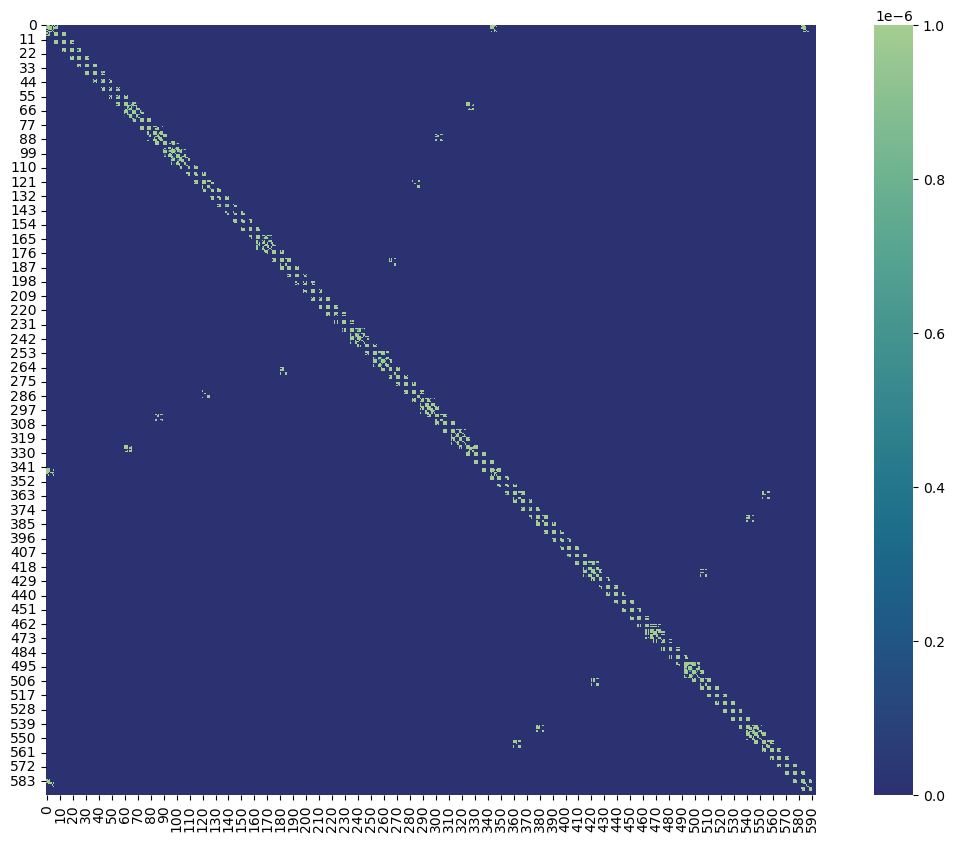

In [198]:
sns.heatmap(np.abs(data), square=True, vmax=0.000001, cmap="crest_r")

## A, B, error, omega analysis

In [193]:
path = Path(r"C:\Users\chris\Documents\Work\Polymetrix\Rust\CruxTest\pose_graph\examples\output\data.json")
with open(path, "r") as inp:
    jacobian_data = json.load(inp)


As, Bs, errors, omegas, Zij, Xi, Xj = zip(*jacobian_data)

length = len(As)

As = np.array(As, dtype=float).reshape((length,6,6))
Bs = np.array(Bs, dtype=float).reshape((length,6,6))
errors = np.array(errors, dtype=float).reshape((length,6,1))
omegas = np.array(omegas, dtype=float).reshape((length,6,6))
Zij = np.array(Zij, dtype=float).reshape((length,4,4))
Xi = np.array(Xi, dtype=float).reshape((length,4,4))
Xj = np.array(Xj, dtype=float).reshape((length,4,4))

<Axes: >

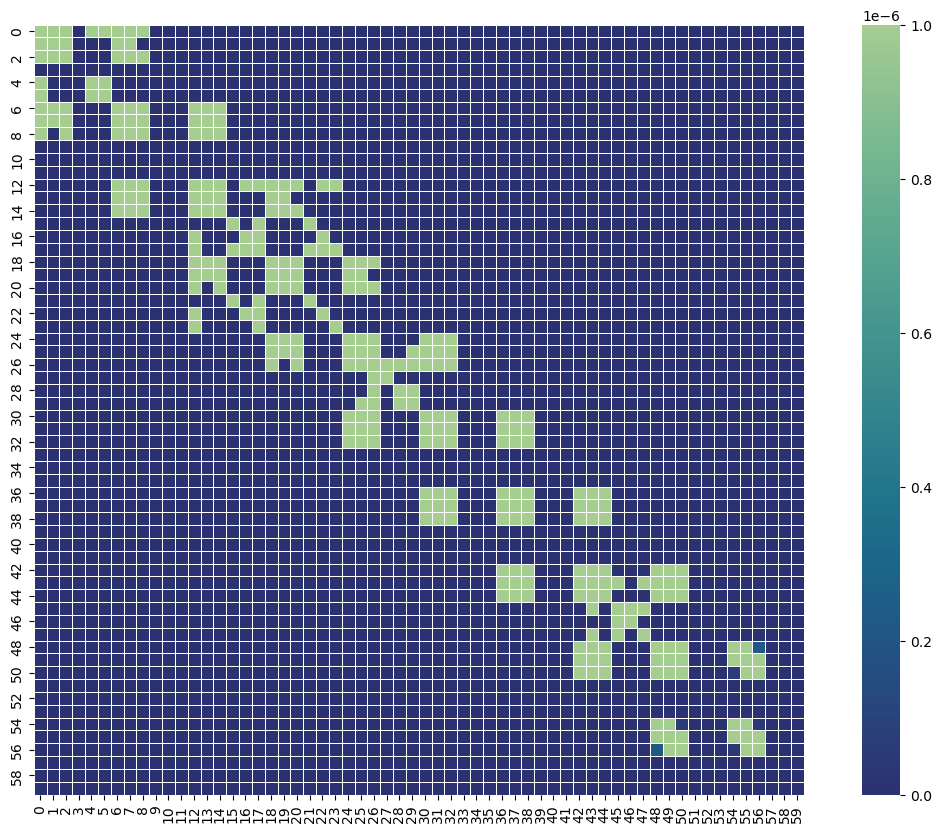

In [205]:
sns.heatmap(np.abs(data[300:360,300:360]), square=True, vmax=0.000001, linewidth=.5, cmap="crest_r")

In [203]:
n=55
As[n]

array([[ 0.9779,  0.0466, -0.0466,  0.    ,  0.    ,  0.0466],
       [ 0.    ,  1.0245,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  1.0245,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ]])

In [204]:
Bs[n]

array([[ 1.0000e+00,  1.7812e-08,  1.8626e-08,  0.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 1.6653e-08,  1.0000e+00, -1.1102e-08,  0.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 2.2204e-08, -1.6653e-08,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])

(array([ 98.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([ 0.    ,  0.0127,  0.0254,  0.0381,  0.0508,  0.0635,  0.0762,  0.0889,  0.1016,  0.1143,  0.127 ,  0.1397,  0.1524,  0.1651,  0.1778,  0.1905,  0.2032,  0.2159,  0.2286,  0.2413,  0.254 ,
         0.2667,  0.2794,  0.2921,  0.3048,  0.3175,  0.3302,  0.3429,  0.3556,  0.3683,  0.381 ,  0.3937,  0.4064,  0.4191,  0.4318,  0.4445,  0.4572,  0.4699,  0.4826,  0.4953,  0.508 ,  0.5207,
         0.5334,  0.5461,  0.5588,  0.5715,  0.5842,  0.5969,  0.6096,  0.6223,  0.635 ]),
 <BarContainer object of 50 artists>)

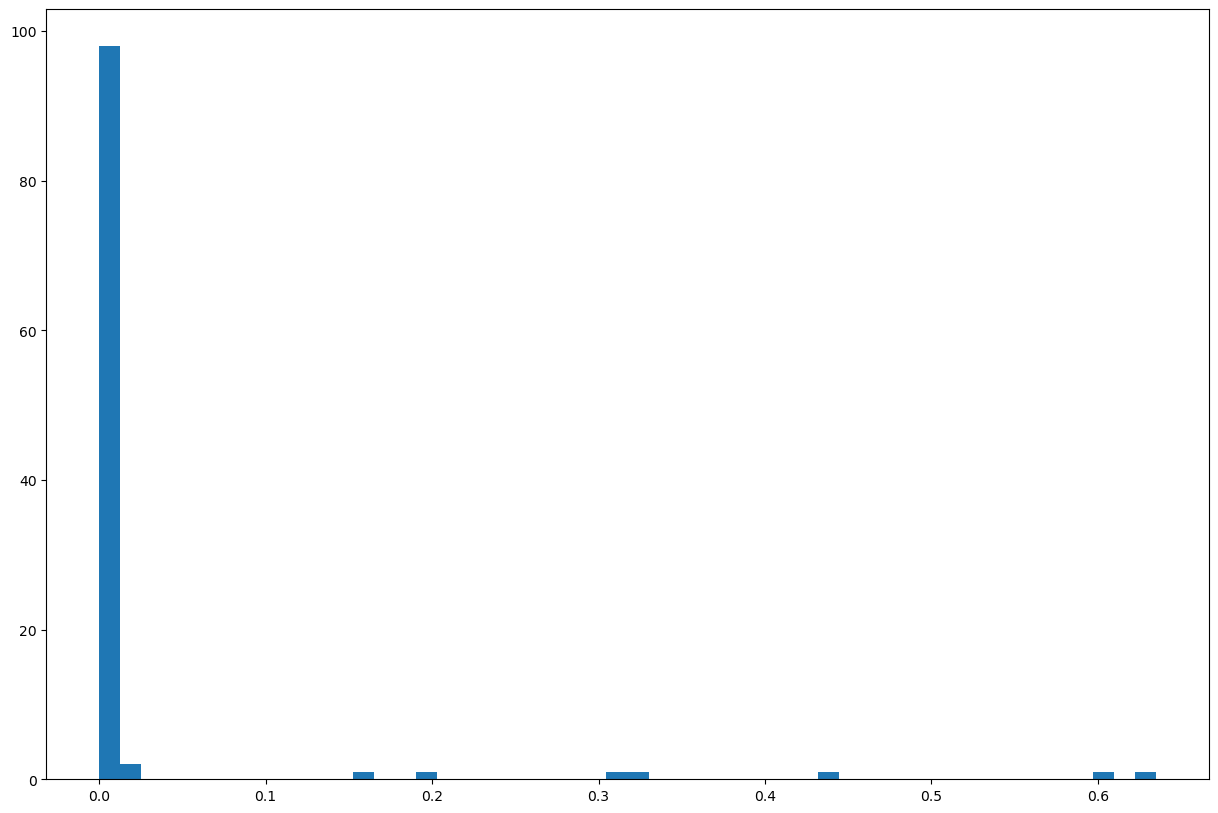

In [196]:
plt.hist(np.linalg.norm(errors, axis=1)[~np.isnan(np.linalg.norm(errors, axis=1))], bins=50)

In [197]:
np.min(np.linalg.norm(errors, axis=1)[~np.isnan(np.linalg.norm(errors, axis=1))])

0.0